# ACTIVIDAD APRENDIZAJE AUTOMÁTICO
Análisis de datos (grupo 2)

Unidad 11, Aprendizaje automático

Camilo Andrés Barajas Rozo

Cédula: 1000330011

**Objetivo:**  Afianzar el conocimiento obtenido en la clasificación.

**Descripción de la actividad**
1.  
     
>*  Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos
de Colombia




In [ ]:
# Se instalar las bibliotecas o paquetes.
!pip install sodapy

In [2]:
# Se cargan o importan las librerías requeridas.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sodapy import Socrata

# Se carga él dataset DNP - Sisbén Personas: https://www.datos.gov.co/Estad-sticas-Nacionales/DNP-Sisb-n-Personas/hq2v-5umk
client = Socrata('www.datos.gov.co', None)
results = client.get('hq2v-5umk')
datos = pd.DataFrame.from_records(results)
datos.head() # Se imprimen las primeras cinco filas del dataset.

,cod_mpio,h_5,i1,i2,i3,i4,i5,i6,i7,i8,...,per011,per012,per013,per014,per015,per016,per017,per018,per019,per020
0,05001,1,1,0,1,1,0,0,1,1,...,9,1,9,9,1,2,2,2,5,99
1,05001,1,1,0,1,1,0,0,1,1,...,9,9,9,9,1,2,2,9,4,99
2,05001,0,1,0,0,0,0,0,0,1,...,9,9,9,9,1,2,2,2,2,10
3,05001,0,1,0,0,0,0,0,0,1,...,2,1,9,9,1,2,2,2,5,99
4,05001,0,1,0,0,0,0,0,0,1,...,9,9,9,9,1,2,2,2,2,10


>*   Realice las tareas de limpieza necesarias

In [3]:
datos.info() # Información general del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_mpio       1000 non-null   object
 1   h_5            1000 non-null   object
 2   i1             1000 non-null   object
 3   i2             1000 non-null   object
 4   i3             1000 non-null   object
 5   i4             1000 non-null   object
 6   i5             1000 non-null   object
 7   i6             1000 non-null   object
 8   i7             1000 non-null   object
 9   i8             1000 non-null   object
 10  i9             1000 non-null   object
 11  i10            1000 non-null   object
 12  i11            1000 non-null   object
 13  i12            1000 non-null   object
 14  i13            1000 non-null   object
 15  i14            1000 non-null   object
 16  i15            1000 non-null   object
 17  grupo          1000 non-null   object
 18  nivel          1000 non-null 

In [4]:
datos.describe() # Información general del dataset.

,cod_mpio,h_5,i1,i2,i3,i4,i5,i6,i7,i8,...,per011,per012,per013,per014,per015,per016,per017,per018,per019,per020
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,2,2,2,2,2,2,2,2,2,...,3,3,6,2,3,3,4,4,6,10
top,05001,0,1,0,0,0,0,0,0,1,...,9,9,9,9,1,2,2,2,2,99
freq,1000,795,545,854,952,761,763,995,843,569,...,632,515,933,933,868,734,739,628,338,662


In [5]:
# Se realiza la limpieza y las transformaciones necesarias al dataset.
X=pd.DataFrame(datos['h_5'].astype(int).rename('Indicador_IPM')) # Se construye el dataframe para hacer la clasificación por grupo de sisbén.
X['Inasistencia_escolar']=datos['i3'].astype(int) # Se convierte el tipo de los datos de la columna 'Inasistencia_escolar' del dataframe a tipo entero.
X['Rezago_escolar']=datos['i14'].astype(int) # Se convierte el tipo de los datos de la columna 'Rezago_escolar' del dataframe a tipo entero.
X['Nivel_Sisbén']=datos['nivel'].astype(int) # Se convierte el tipo de los datos de la columna 'Nivel_Sisbén' del dataframe a tipo entero.
X['Identifi_vivienda']=datos['llave'].astype(int) # Se convierte el tipo de los datos de la columna 'Identifi_vivienda' del dataframe a tipo entero.
X.dropna(axis=0, how='any') # Se borran los valores nulos.

X.head() # Se imprimen las primeras cinco filas del dataset.

,Indicador_IPM,Inasistencia_escolar,Rezago_escolar,Nivel_Sisbén,Identifi_vivienda
0,1,1,0,3,1
1,1,1,0,3,1
2,0,0,0,8,2
3,0,0,0,8,2
4,0,0,0,8,2


In [6]:
X.info() # Información general del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Indicador_IPM         1000 non-null   int64
 1   Inasistencia_escolar  1000 non-null   int64
 2   Rezago_escolar        1000 non-null   int64
 3   Nivel_Sisbén          1000 non-null   int64
 4   Identifi_vivienda     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [7]:
# Utiliza el label_encoder para asignar un valor numérico a la variable "grupo".
from sklearn.preprocessing import LabelEncoder
def label_encoder(datos_categoria):
    le = LabelEncoder()
    datos[datos_categoria] = le.fit_transform(datos[datos_categoria])

variables = ["grupo"]

for l in variables:
    label_encoder(l)

y=datos["grupo"] # Se crea la variable predictora y.

In [8]:
# Se verifica que la variable "grupo" se cambió a valores numéricos.
y.head()

0    2
1    2
2    2
3    2
4    2
Name: grupo, dtype: int64

In [9]:
# Se crea una función para contar los elementos únicos de una lista o columna de dataset.
def contar(n, vec):
  '''Para esta funcion n es el numero a contar y vec es la lista donde contar '''
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

In [10]:
# Frecuencia de los grupos de la variable predictora y.
fa_y=[]
cont=0
for i in range(min(y),max(y)+1):
  fa_y.append(contar(i,y))
  print(i, 'Se repite -->',fa_y[cont])
  cont+=1

0 Se repite --> 66
1 Se repite --> 236
2 Se repite --> 504
3 Se repite --> 194


>*  Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de
prueba serán el 15% del dataset


In [11]:
# Se cargarán las librerías requeridas, en este caso dos funcionalidades que hacen parte de submódulos de sklearn.
from sklearn.neighbors import KNeighborsClassifier # Es el clasificador de K vecinos más cercanos.
from sklearn.model_selection import train_test_split # Es el que divide el dataset entre datos de prueba y datos de entrenamiento.

# Se divide el data set en conjunto de datos de prueba y de entrenamiento.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15,random_state=123, stratify=y)

# Se comprueba que la división del dataset los datos de prueba corresponden al 15%.
print('------------')
print('------------')
print(len(X_train),'X_train')
print(len(y_train),'y_train')
print('------------')
print(len(X_test),'X_test')
print(len(y_test),'y_test')
print('------------')
print('------------')

------------
------------
850 X_train
850 y_train
------------
150 X_test
150 y_test
------------
------------


>*  Aplicar el algoritmo de clasificación de los K vecinos más cercanos

In [12]:
# Prueba de número de vecinos.
# Se crearán diccionarios que contendrán los puntajes tanto para el conjunto de entrenamiento como para el conjunto de prueba,
# y se calcularán dichos puntajes para un número de vecinos que varía entre 1 y 9.
train_scores={}
test_scores={}
neighbors=np.arange(1,10)
for neighbor in neighbors:
  Knn=KNeighborsClassifier(n_neighbors=neighbor)
  Knn.fit(X_train,y_train)
  train_scores[neighbor]=Knn.score(X_train,y_train)
  test_scores[neighbor]=Knn.score(X_test,y_test)

# Se muestra los resultados.
print('-------------------------------------')
print('Resultado de score de entrenamiento')
print(train_scores)
print('-------------------------------------')
print('Resultado de score de prueba')
print(test_scores)

-------------------------------------
Resultado de score de entrenamiento
{1: 1.0, 2: 0.9623529411764706, 3: 0.9505882352941176, 4: 0.8729411764705882, 5: 0.8564705882352941, 6: 0.8070588235294117, 7: 0.7823529411764706, 8: 0.7435294117647059, 9: 0.7141176470588235}
-------------------------------------
Resultado de score de prueba
{1: 0.9333333333333333, 2: 0.8666666666666667, 3: 0.82, 4: 0.7333333333333333, 5: 0.7333333333333333, 6: 0.66, 7: 0.6533333333333333, 8: 0.6266666666666667, 9: 0.6}


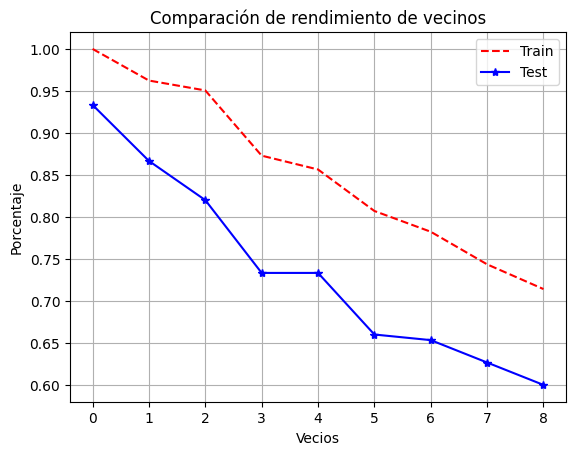

In [13]:
# Gráfica de los puntajes score.
plt.plot(list(train_scores.values()), 'r--', label='Train')
plt.plot(list(test_scores.values()), 'b*-', label='Test')
plt.legend()
plt.xlabel('Vecios')
plt.ylabel('Porcentaje')
plt.title('Comparación de rendimiento de vecinos')
plt.grid()
plt.show()

>>  En cuanto al comportamiento de los vecinos respecto al puntaje "score" podemos concluir según la gráfica respecto a la tendencia de los puntajes de entrenamiento y prueba; y sus respectivos valores para diferentes k. El número de vecinos óptimo, es de  k=1 porque se observa que alcanza su punto máximo en el porcentaje correspondiente a 1 en entrenamiento y 0.933 en prueba y luego disminuye gradualmente a medida que aumenta k. Por lo tanto, el parámetro de vecinos fijado en uno es el apropiado en los datos de entrenamiento como en los de prueba.

In [14]:
# Implementación del modelo de los K vecinos más cercanos.
Knn=KNeighborsClassifier(n_neighbors=1) # Se instala al clasificador con el parámetro n_neighbors=1.
Knn.fit(X_train,y_train) # Se procede a entrenar el modelo con los datos dispuestos para este fin.

KNeighborsClassifier(n_neighbors=1)

>*  Calcular los puntajes de la clasificación

In [15]:
# Se muestra los resultados.
print('------------------------')
print('Resultados obtenidos')
print(Knn.predict(X_test)) # Se predice a qué grupo de sisbén pertenecen los datos de prueba, obteniendo el listado.
print('------------------------')
print('Score de validación')
Knn.score(X_test,y_test) # Se procede a calcular el puntaje de la clasificación realizada para los datos de prueba.

------------------------
Resultados obtenidos
[0 0 1 2 1 3 3 2 2 3 3 2 2 2 2 2 1 2 3 3 2 0 3 2 3 2 2 2 1 2 1 2 2 1 2 1 2
 0 2 1 1 2 2 0 2 3 2 2 1 2 1 2 2 2 1 3 1 2 2 3 2 2 1 2 2 2 3 2 2 3 3 1 1 2
 2 2 2 2 2 1 2 3 1 2 2 3 2 3 1 3 3 2 2 3 2 1 2 2 1 1 2 3 1 0 1 2 1 3 1 1 2
 2 0 3 3 0 2 2 2 3 3 3 2 1 2 2 1 2 1 2 0 2 3 1 0 2 1 1 1 2 3 3 2 2 2 2 1 2
 3 2]
------------------------
Score de validación


0.9333333333333333

In [16]:
# Se compara la predicción hecha para los datos de prueba.
print('------------------------')
print('Clasificación establecida en los datos de prueba.')
print(y_test.values)
print('------------------------')
print('Resultados de la predicción datos de prueba.')
print(Knn.predict(X_test))

------------------------
Clasificación establecida en los datos de prueba.
[0 0 1 3 1 3 3 2 3 3 2 2 2 2 2 2 1 2 3 3 2 0 2 2 3 2 2 2 1 2 1 2 2 1 2 1 3
 0 2 1 1 2 2 0 2 3 2 2 1 2 1 2 2 2 1 3 1 2 2 3 2 2 1 2 2 3 3 2 2 2 2 1 1 2
 2 2 2 2 2 1 2 3 1 2 2 3 2 3 1 3 3 2 2 3 2 1 2 2 1 1 2 3 1 0 1 2 1 2 1 1 2
 2 0 3 2 0 2 2 2 3 3 3 2 1 2 2 1 2 1 2 0 2 3 1 0 2 1 1 1 2 3 3 2 2 2 2 1 2
 3 2]
------------------------
Resultados de la predicción datos de prueba.
[0 0 1 2 1 3 3 2 2 3 3 2 2 2 2 2 1 2 3 3 2 0 3 2 3 2 2 2 1 2 1 2 2 1 2 1 2
 0 2 1 1 2 2 0 2 3 2 2 1 2 1 2 2 2 1 3 1 2 2 3 2 2 1 2 2 2 3 2 2 3 3 1 1 2
 2 2 2 2 2 1 2 3 1 2 2 3 2 3 1 3 3 2 2 3 2 1 2 2 1 1 2 3 1 0 1 2 1 3 1 1 2
 2 0 3 3 0 2 2 2 3 3 3 2 1 2 2 1 2 1 2 0 2 3 1 0 2 1 1 1 2 3 3 2 2 2 2 1 2
 3 2]


In [17]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,Knn.predict(X_test))

# Nombres de filas y columnas
filas = ['Grupo sisben A', 'Grupo sisben B', 'Grupo sisben C', 'Grupo sisben D']
columnas = ['Grupo sisben A', 'Grupo sisben B', 'Grupo sisben C', 'Grupo sisben D']

# Crear DataFrame
dfConfusión = pd.DataFrame(CM, index=filas, columns=columnas)
dfConfusión.index.name = 'Reales'
dfConfusión.columns.name = 'Predicciones'
dfConfusión # Se presenta la matriz de confusión.

Predicciones,Grupo sisben A,Grupo sisben B,Grupo sisben C,Grupo sisben D
Reales,,,,
Grupo sisben A,10,0,0,0
Grupo sisben B,0,35,0,0
Grupo sisben C,0,0,70,6
Grupo sisben D,0,0,4,25




>*  Concluir si la clasificación fue buena o no

> > Al analizar el dataset cargado, se observa que el puntaje "score" de validación es de 0.933, indica que el modelo ha obtenido un buen rendimiento general en los datos de validación. Dado que en cuanto más cercano esté el score a 1, mejor será el rendimiento.

> > Respecto a la matriz de confusión, muestra que hay muy pocos errores en la clasificación, ya que la mayoría de los valores fuera de la diagonal principal son ceros, constándole un poco más la clasificación del grupo sisben D que clasificó a 4 en el grupo C cuando en realidad eran en el grupo D. Esto sugiere que el modelo ha logrado una clasificación precisa.

> > En general, los resultados sugieren que el modelo de k vecinos ha realizado una buena clasificación del grupo de Sisben de las personas, con un alto nivel de precisión y pocos errores. Sin embargo, es importante tener en cuenta que se requiere un análisis más exhaustivo y considerar nuevos parámetros de entrada u observaciones para realizar predicciones de la clasificación del modelo.

2.  
     
>*  Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos
de Colombia


In [18]:
# Se carga él dataset registro información contraloría de córdoba: https://www.datos.gov.co/Organismos-de-Control/Registro-Activo-de-Informaci-n/7era-c7uq
client = Socrata('www.datos.gov.co', None)
results = client.get('7era-c7uq')
datosKmee = pd.DataFrame.from_records(results)
datosKmee.head() # Se imprimen las primeras cinco filas del dataset.

,id,proceso,area_dependencia,activo_de_informacion,digital,fisico,ubicaci_n,formato,idioma,informacion_publicada_en,misional,clasificacion
0,1,Responsabilida Fiscal,Responsabilidad Fiscal,Audiencias R.F.,Si,No,Equipo backup video,MPG,Español,No,Si,Reservada
1,2,Responsabilida Fiscal,Responsabilidad Fiscal,Expediente Proceso R.F.,No,Si,Oficina de R.F.,impresos,Español,No,Si,Reservada
2,3,Responsabilida Fiscal,Responsabilidad Fiscal,Procesos sancionatorios,Si,Si,Equipo Res_F/Oficina de R.F.,"doc, pdf,xls, impresos",Español,No,Si,Reservada
3,4,Responsabilida Fiscal,Responsabilidad Fiscal,Juridiccion coactiva,Si,Si,Equipo Res_F/Oficina de R.F.,"doc, pdf,xls, impresos",Español,No,Si,Reservada
4,5,Responsabilida Fiscal,Responsabilidad Fiscal,Notificaciones por aviso,Si,Si,Equipo Res_F/Oficina de R.F.,"doc, pdf,xls, impresos",Español,Si,Si,Pública


>*   Realice las tareas de limpieza necesarias

In [19]:
datosKmee.info() # Información general del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        51 non-null     object
 1   proceso                   51 non-null     object
 2   area_dependencia          51 non-null     object
 3   activo_de_informacion     51 non-null     object
 4   digital                   51 non-null     object
 5   fisico                    51 non-null     object
 6   ubicaci_n                 51 non-null     object
 7   formato                   51 non-null     object
 8   idioma                    51 non-null     object
 9   informacion_publicada_en  51 non-null     object
 10  misional                  51 non-null     object
 11  clasificacion             51 non-null     object
dtypes: object(12)
memory usage: 4.9+ KB


In [20]:
datosKmee.describe() # Información general del dataset.

,id,proceso,area_dependencia,activo_de_informacion,digital,fisico,ubicaci_n,formato,idioma,informacion_publicada_en,misional,clasificacion
count,51,51,51,51,51,51,51,51,51,51,51,51
unique,51,9,6,50,2,2,18,16,1,2,2,3
top,1,Direccionamiento Estrategico,Secretaria General,Comunicaciones Enviadas y Recibidas,Si,Si,Equipo Apolo/of. Sec. Gral,impresos,Español,Si,Si,Pública
freq,1,10,21,2,40,47,6,11,51,32,30,33


In [21]:
# Se realiza la limpieza y las transformaciones necesarias al dataset.
# Utiliza el label_encoder para asignar un valor numérico a las variables "proceso", "area_dependencia", "ubicaci_n", "formato" y "misional".
datosKmE=pd.DataFrame(datosKmee['id'].astype(int)) # Se construye el dataframe para hacer la agrupación por grupo de misional.
def label_encoder(datos_categoria):
    le = LabelEncoder()
    datosKmE[datos_categoria]= le.fit_transform(datosKmee[datos_categoria])

variables = ['proceso','area_dependencia','ubicaci_n','formato','misional']

for l in variables:
    label_encoder(l)

# Se cambia el índice del dataframe construido anteriormente.
datosKmE=datosKmE.set_index('id')

In [22]:
# Se verifica que las variables se cambiaron a valores numéricos.
datosKmE.head()

,proceso,area_dependencia,ubicaci_n,formato,misional
id,,,,,
1,8,2,4,4,1
2,8,2,14,11,1
3,8,2,7,7,1
4,8,2,7,7,1
5,8,2,7,7,1


In [23]:
# Se separan las variables predictoras de la variable objetivo, a las predictoras se les llamará xContraCordoba y a las predictoras yContraCordoba.
yContraCordoba = datosKmE["misional"]
xContraCordoba = datosKmE.drop("misional",axis=1)


In [24]:
# Se verifica que se haya hecho la separación.
print(xContraCordoba.head()) # Se imprimen las primeras cinco filas del dataset.
print('----------------------------------------')
print(yContraCordoba.head()) # Se imprimen las primeras cinco filas del dataset.

    proceso  area_dependencia  ubicaci_n  formato
id                                               
1         8                 2          4        4
2         8                 2         14       11
3         8                 2          7        7
4         8                 2          7        7
5         8                 2          7        7
----------------------------------------
id
1    1
2    1
3    1
4    1
5    1
Name: misional, dtype: int64


>*   Aplicar el algoritmo de agrupamiento de las K medias

In [25]:
# Se cargarán las librerías requeridas, en este caso una funcionalidad que hacen parte de submódulos de sklearn y una librería para poder desarrollar gráficas en 3D.
from sklearn.cluster import KMeans # Se encargada de hacer la agrupación.
from mpl_toolkits.mplot3d import Axes3D # Gráficas en 3D

In [26]:
# Se busca cuál es el mejor valor de grupos a definir.
inercias=[]
for i in range(1,len(xContraCordoba+1)):
  Kmeans=KMeans(n_clusters=i,max_iter=300)
  Kmeans.fit(xContraCordoba)
  inercias.append(Kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

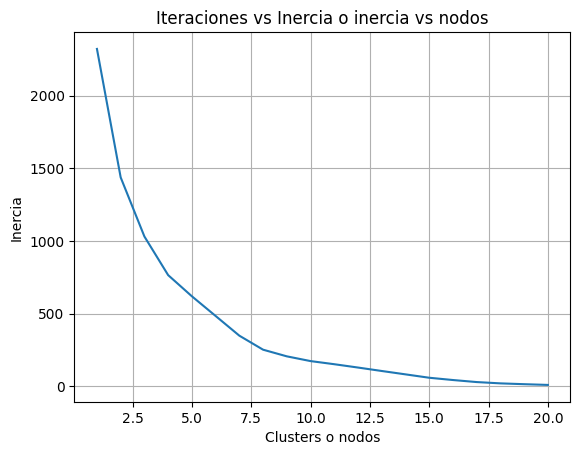

In [27]:
# Gráfica de inercia vs nodos.
plt.plot(range(1,21),inercias[:20])
plt.xlabel('Clusters o nodos')
plt.ylabel('Inercia')
plt.title('Iteraciones vs Inercia o inercia vs nodos')
plt.grid()
plt.show()

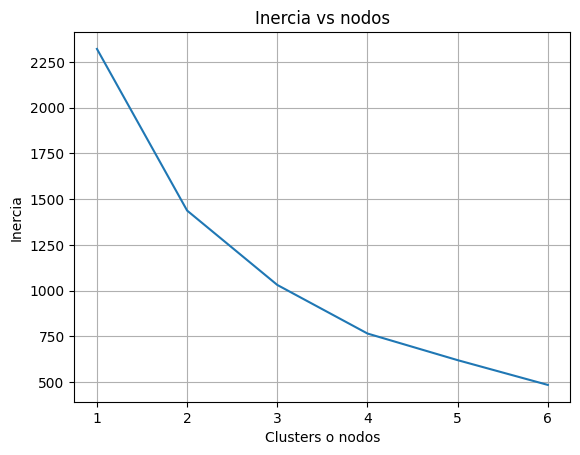

In [28]:
# Zoom a la gráfica de inercia vs nodos.
plt.plot(range(1,7),inercias[:6])
plt.xlabel('Clusters o nodos')
plt.ylabel('Inercia')
plt.title('Inercia vs nodos')
plt.grid()
plt.show()

 > > Al observar la anterior gráfica se establece que el punto donde los nuevos grupos dejan de disminuir significativamente su inercia es n_clusters=2, dado que  a partir de este valor la línea toma una tendencia horizontal, por lo tanto, se dice que es el codo de la gráfica, que es la cantidad ideal de grupos y además coincide con lo establecido anteriormente en la variable "misional" que solo posee dos respuestas si o no, en consecuencia estamos logrando una buena reducción en la inercia sin comprometer la estructura y la similitud de los grupos. Proporcionando una agrupación coherente y representativa de los datos.

In [29]:
# Implementación del modelo de agrupamiento de las k medias.
Kmeans=KMeans(n_clusters=2, max_iter=150) #Se instala el agrupamiento con los parámetros n_clusters=2 y max_iter=150.
objetivos=Kmeans.fit_predict(xContraCordoba) # Se procede a entrenar y predecir el modelo con los datos dispuestos para este fin.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


>*  Calcular los puntajes de la clasificación

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

# Obtiene las etiquetas de los grupos
etiquetas = Kmeans.labels_
# Calcula el puntaje de la agrupación
puntaje = silhouette_score(xContraCordoba, etiquetas)

# Se muestra los resultados.
print('------------------------')
print('Resultados obtenidos')
print(objetivos) # Se muestran los resultados de la predicción, obteniendo el listado.
print('------------------------')
print('Score de validación')
print(Kmeans.score(xContraCordoba)) # Se procede a calcular el puntaje de la agrupación.
print('------------------------')
print('Inercia del algoritmo')
print(Kmeans.inertia_) # Se presenta la inercia del algoritmo.
print('------------------------')
print('Puntaje de la agrupación')
print(puntaje) # Se presenta el puntaje de la agrupación.
print('------------------------')
print('Puntaje de la precisión y el rendimiento')
print(f1_score(objetivos, yContraCordoba)) # Se presenta la precisión y el rendimiento en función de la precisión y el recall.

------------------------
Resultados obtenidos
[1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 1 1 1]
------------------------
Score de validación
-1436.9642857142858
------------------------
Inercia del algoritmo
1436.964285714286
------------------------
Puntaje de la agrupación
0.36235693204309016
------------------------
Puntaje de la precisión y el rendimiento
0.3793103448275862


In [31]:
# Se compara la predicción hecha para los datos de prueba.

print('------------------------')
print('Agrupamiento establecido en los datos.')
print(yContraCordoba.values)
print('------------------------')
print('Agrupamiento de la predicción en los datos.')
print(objetivos)

------------------------
Agrupamiento establecido en los datos.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
------------------------
Agrupamiento de la predicción en los datos.
[1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [32]:
# Frecuencia agrupamiento establecido en los datos.
# Se utiliza la función contar establecida anteriormente.
print('---------------------------------------------------')
print('---------------------------------------------------')
print('Frecuencia agrupamiento establecido en los datos')
print('---------------------------------------------------')
fa_Result=[]
cont=0
for i in range(min(yContraCordoba),max(yContraCordoba)+1):
  fa_Result.append(contar(i,yContraCordoba))
  print(i, 'Se repite -->',fa_Result[cont])
  cont+=1

# Frecuencia agrupamiento de la predicción en los datos.
# Se utiliza la función contar establecida anteriormente.
print('---------------------------------------------------')
print('---------------------------------------------------')
print('Frecuencia agrupamiento de la predicción en los datos')
print('---------------------------------------------------')
fa_objetivos=[]
cont=0
for i in range(min(objetivos),max(objetivos)+1):
  fa_objetivos.append(contar(i,objetivos))
  print(i, 'Se repite -->',fa_objetivos[cont])
  cont+=1
print('---------------------------------------------------')
print('---------------------------------------------------')


---------------------------------------------------
---------------------------------------------------
Frecuencia agrupamiento establecido en los datos
---------------------------------------------------
0 Se repite --> 21
1 Se repite --> 30
---------------------------------------------------
---------------------------------------------------
Frecuencia agrupamiento de la predicción en los datos
---------------------------------------------------
0 Se repite --> 23
1 Se repite --> 28
---------------------------------------------------
---------------------------------------------------


>*  Representar gráficamente los grupos


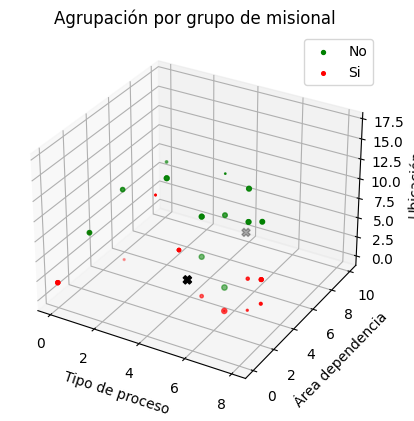

In [33]:
# Diagrama en 3D agrupación por grupo misional.
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('Tipo de proceso')
ax.set_ylabel('Área dependencia')
ax.set_zlabel('Ubicación')
plt.title('Agrupación por grupo de misional')
ax.scatter(xContraCordoba.proceso[objetivos==0],xContraCordoba.area_dependencia[objetivos==0],xContraCordoba.ubicaci_n[objetivos==0],
           s=xContraCordoba.formato[objetivos==0],color='green',label='No')

ax.scatter(xContraCordoba.proceso[objetivos==1],xContraCordoba.area_dependencia[objetivos==1],xContraCordoba.ubicaci_n[objetivos==1],
           s=xContraCordoba.formato[objetivos==1],color='red',label='Si')

ax.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,3], s=35, color='black', marker='X')
plt.legend()
plt.show()

>* Concluir si la agrupación fue buena o no

> > Al analizar el dataset cargado, se observa que en cuanto a la cantidad de elementos pertenecientes a cada grupo de la variable "misional" en los datos reales y en la predicción. "No" tiene una cantidad de 21 en los datos reales y 28 en la predicción, mientras que el grupo "Si" tiene una cantidad de 30 en los datos reales y 23 en la predicción. De modo que la cantidad de datos  en cada grupo es similar entre los reales y la predicción (habiendo tan solo una diferencia de 7 mal agrupados), esto indica una buena agrupación.

>> En cuanto al puntaje "score" de validación y la inercia son medidas utilizadas para evaluar la calidad de la agrupación, el score de validación es negativo (-1436.964), lo cual no es una medida confiable de evaluación. La inercia es igual al score de validación en valor absoluto (1436.964), esta representa la suma de las distancias cuadradas entre cada punto y el centroide de su grupo. Si la inercia es baja, indica que los puntos dentro de cada grupo están cercanos entre sí y alejados de los puntos de otros grupos. En este caso, la inercia es alta, lo cual puede sugerir una dispersión considerable entre los grupos.

>> Respecto al puntaje de la agrupación "silhouette_score", es una medida de evaluación de la calidad de la agrupación. Donde un valor cercano a 1 indica una buena separación entre los grupos. En este caso el valor es de 0.362, lo cual sugiere que existe cierta separación entre los grupos.

>> Puntaje de la precisión y el rendimiento "f1_score", es una medida para evaluar el rendimiento, un valor más cercano a 1 indica un mejor rendimiento. En este caso el valor es de 0.717, lo cual indica un rendimiento aceptable.

>> En la gráfica 3D se puede observar claramente una diferencia y correlación entre los grupos, así como el centro de cada grupo, esto respalda la calidad de la agrupación.

>> En general, considerando los resultados y medidas de evaluación mencionados, podemos concluir que la agrupación en el modelo de k medias para la variable "misional" ha sido aceptable, ya que con lo anterior mente mencionada no se puede establecer una agrupación confiable para el conjunto de datos de registro de información de la controlaría de córdoba.